<a href="https://colab.research.google.com/github/SrinithiSrinivasan/Data-Analytics/blob/master/Classification_NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#load data
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
iris = load_iris()
iris1 = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [12]:
iris


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
5,5.4,3.9,1.7,0.4,0.0
6,4.6,3.4,1.4,0.3,0.0
7,5.0,3.4,1.5,0.2,0.0
8,4.4,2.9,1.4,0.2,0.0
9,4.9,3.1,1.5,0.1,0.0


In [0]:
#create Naive Bayes model
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
#pred = model.fit(iris.data,iris.target).predict([[4.7,3.2,1.6,0.2]])

In [0]:
#split training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3,random_state=109)

In [0]:
#fit model and predict
model_fit = model.fit(X_train,y_train)
model_predict = model.predict(X_test)

In [31]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,model_predict)

array([[12,  0,  0],
       [ 0, 16,  1],
       [ 0,  1, 15]])

Text(0, 0.5, 'True Positive Rate')

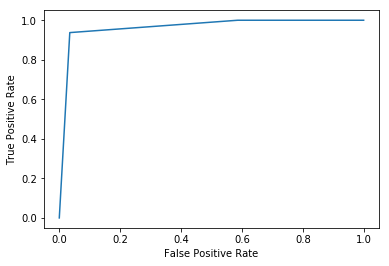

In [40]:
#roc curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt


fpr, tpr, thresholds = roc_curve(y_test, model_predict,pos_label=2)
#roc_auc = auc(y_test, model_predict)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

[0.48484848 0.9375     1.        ]
[1.     0.9375 0.    ]


Text(0, 0.5, 'Recall')

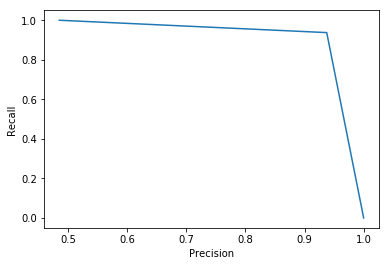

In [47]:
#precision recall curve
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test,model_predict,pos_label=2)
print(precision)
print(recall)
import matplotlib.pyplot as plt

plt.plot(precision,recall)
plt.xlabel("Precision")
plt.ylabel("Recall")